[View in Colaboratory](https://colab.research.google.com/github/brudder003/AlgorithmDesign/blob/master/hw1/hw1_br.ipynb)

# Homework 1
Here's the companion code for Homework 1.

Check out https://matplotlib.org/users/pyplot_tutorial.html for a good tutorial on using matplotlib if you are getting hung up on the graphics stuff, although hopefully you shouldn't have to mess with it.

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#  Exercise 1

### Here, you generate a plot that convinces you (and the grader) that 2*log_2(x) = O(0.5 * log_10(x) + 2) 

Text(0.5,1,'T and g')

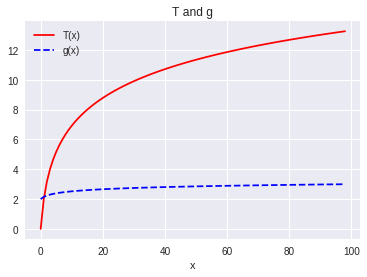

In [2]:
## Consider the following definitions of T(x) and g(x):
def g(x):
    return 0.5 * np.log10(x) + 2

def T(x):
    return 2 * np.log2(x)

## Let's plot them
plt.plot([T(x) for x in range(1, 100)], color="red", label="T(x)")
plt.plot([g(x) for x in range(1, 100)], '--', color="blue", label="g(x)")
plt.xlabel("x")
plt.legend()
plt.title("T and g")

Clearly T(x) > g(x) for all x >= 3. However, we claim T(x) = O(g(x)); that is, T is asymptotically no larger than g.

To show this is true, we need to find some c and some n_0 such that: for all n >= n_0, T(n) <= cg(n). 

By adjusting the values below, find such a c and an n_0, and create a picture that convinces you (and the grader) that T(x) = O(g(x)).

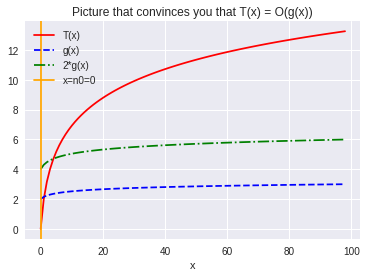

In [3]:
c = 2   # TODO: FILL IN YOUR ANSWER HERE (change c = 2 to a correct value)
n0 = 0  # TODO: FILL IN YOUR ANSWER HERE (change n0 = 0 to a correct value)

# Plots our three functions
plt.plot([T(x) for x in range(1, 100)], color="red", label="T(x)")
plt.plot([g(x) for x in range(1, 100)], '--', color="blue", label="g(x)")
plt.plot([c*g(x) for x in range(1, 100)], '-.', color="green", label=str(c)+"*g(x)")

# Plots the vertical line
plt.axvline(n0, color="orange", label="x=n0=" + str(n0))

# Adds some text
plt.xlabel("x")
plt.title("Picture that convinces you that T(x) = O(g(x))")
plt.legend()

### TURN IN: your choice of c, n_0, your plot, and a short (a sentence or two) explanation about why the plot shows that T(n) = O(g(n)).

### NOTE: you can right click the images in the notebook and click "save as" to get a .png file.  You can then include this in your homework write-up.

#  Exercise 2

### Here, you compare the pros and cons of insertion sort and mergesort.

Below is some code that measures the runtime of insertion sort and merge sort running on some random inputs, and plots the output.

In [12]:
def insertion_sort(A):
    result = A.copy()
    for i in range(1, len(result)):
        cur_value = result[i]
        j = i - 1
        while j >= 0 and result[j] > cur_value:
            result[j+1] = result[j]
            j -= 1
        result[j+1] = cur_value
    return result

def merge(L, R):
    result = []
    l_idx, r_idx = (0, 0)
    while l_idx < len(L) and r_idx < len(R):
        if L[l_idx] < R[r_idx]:
            result.append(L[l_idx])
            l_idx += 1
        else:
            result.append(R[r_idx])
            r_idx += 1
    result.extend(L[l_idx:len(L)])
    result.extend(R[r_idx:len(R)])
    return result

def mergesort(A):
    if len(A) <= 1:
        return A
    n = len(A)
    L = mergesort(A[0:n//2])  # // uses integer division
    R = mergesort(A[n//2:n])
    return merge(L, R)

In [14]:
import time

def simulate_sort(ns, shuffle_fn):
    insertion_sort_ts = []
    mergesort_ts = []

    for n in ns:
        numbers = list(range(n))
        insertion_sort_runtimes = []
        mergesort_runtimes = []
        numTrials = 50
        for t in range(numTrials):
            numbers_t = shuffle_fn(numbers)

            # Find runtimes of insertion sort in milliseconds
            insertion_sort_start = time.time()
            insertion_sort(numbers_t)
            insertion_sort_end = time.time()
            insertion_sort_runtimes.append((insertion_sort_end - insertion_sort_start) * 1000)

            # Find runtimes of mergesort in milliseconds
            mergesort_start = time.time()
            mergesort(numbers_t)
            mergesort_end = time.time()
            mergesort_runtimes.append((mergesort_end - mergesort_start) * 1000)

        insertion_sort_ts.append(insertion_sort_runtimes)
        mergesort_ts.append(mergesort_runtimes)
    
    return np.array(insertion_sort_ts), np.array(mergesort_ts)

In [15]:
# Takes ~1 min to run
from random import sample
ns = list(range(100, 2000, 200))
insertion_sort_random_ts, mergesort_random_ts = simulate_sort(ns, lambda l: sample(l, len(l)))

# Takes ~1.5 min to run
ns = list(range(100, 2000, 200))
insertion_sort_reverse_ts, mergesort_reverse_ts = simulate_sort(ns, lambda l: l[::-1])

# Takes ~5 sec to run
ns = list(range(100, 2000, 200))
insertion_sort_sorted_ts, mergesort_sorted_ts = simulate_sort(ns, lambda l: l)

## Exercise 2a

### Referencing Fig 2.1-3, for what input types is insertion sort faster than mergesort? And for what input types is mergesort faster than insertion sort?

### TURN IN: 1-2 sentence answers to these questions.

In [34]:
np.log(10/20)

-0.6931471805599453

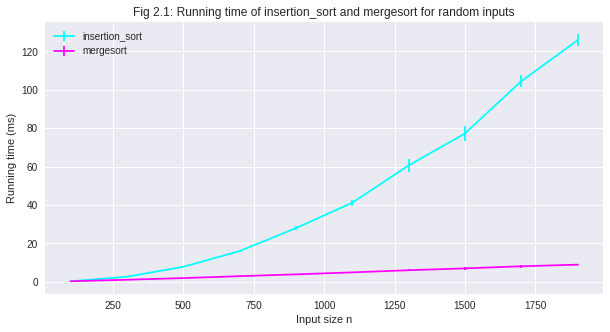

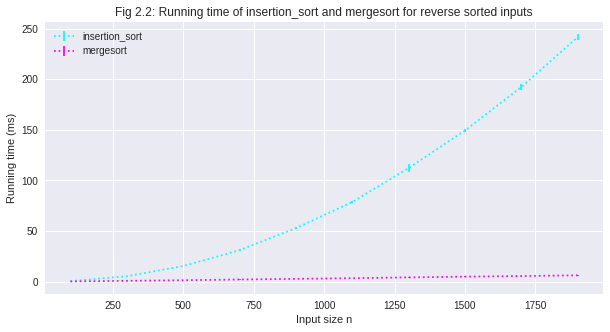

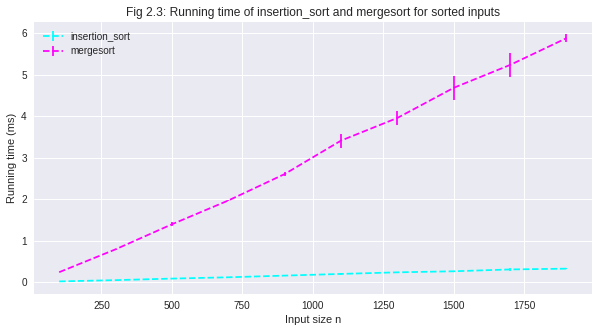

In [30]:
# Plots Figure 2.1
plt.figure(figsize=(10,5))
plt.errorbar(ns,
             np.mean(insertion_sort_random_ts, axis=1),
             yerr=np.std(insertion_sort_random_ts, axis=1),
             color="cyan",
             label="insertion_sort")
plt.errorbar(ns,
             np.mean(mergesort_random_ts, axis=1),
             yerr=np.std(mergesort_random_ts, axis=1),
             color="magenta",
             label="mergesort")
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Fig 2.1: Running time of insertion_sort and mergesort for random inputs")
plt.legend()

# Plots Figure 2.2
plt.figure(figsize=(10,5))
plt.errorbar(ns,
             np.mean(insertion_sort_reverse_ts, axis=1),
             yerr=np.std(insertion_sort_reverse_ts, axis=1),
             linestyle=":",
             color="cyan",
             label="insertion_sort")
plt.errorbar(ns,
             np.mean(mergesort_reverse_ts, axis=1),
             yerr=np.std(mergesort_reverse_ts, axis=1),
             linestyle=":",
             color="magenta",
             label="mergesort")
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Fig 2.2: Running time of insertion_sort and mergesort for reverse sorted inputs")
plt.legend()

# Plots Figure 2.3
plt.figure(figsize=(10,5))
plt.errorbar(ns,
             np.mean(insertion_sort_sorted_ts, axis=1),
             yerr=np.std(insertion_sort_sorted_ts, axis=1),
             linestyle="--",
             color="cyan",
             label="insertion_sort")
plt.errorbar(ns,
             np.mean(mergesort_sorted_ts, axis=1),
             yerr=np.std(mergesort_sorted_ts, axis=1),
             linestyle="--",
             color="magenta",
             label="mergesort")
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Fig 2.3: Running time of insertion_sort and mergesort for sorted inputs")
plt.legend()

## Exercise 2b

### Referencing Fig 2.4-5, how does the variability of runtimes of insertion sort on different input types compare to the variability of runtimes of mergesort on different inputs types? Given what you know about insertion sort and mergesort, offer an explanation of why this is the case.

### TURN IN: 1-2 sentence answers to these questions.

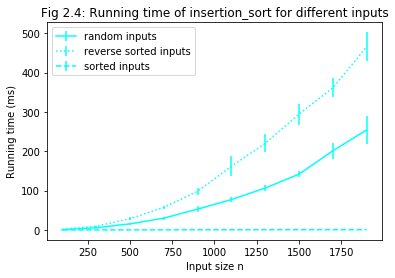

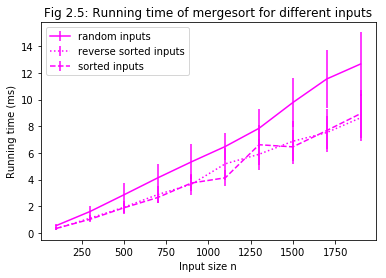

In [0]:
# Plots Figure 2.4
plt.figure()
plt.errorbar(ns,
             np.mean(insertion_sort_random_ts, axis=1),
             yerr=np.std(insertion_sort_random_ts, axis=1),
             color="cyan",
             label="random inputs")
plt.errorbar(ns,
             np.mean(insertion_sort_reverse_ts, axis=1),
             yerr=np.std(insertion_sort_reverse_ts, axis=1),
             linestyle=":",
             color="cyan",
             label="reverse sorted inputs")
plt.errorbar(ns,
             np.mean(insertion_sort_sorted_ts, axis=1),
             yerr=np.std(insertion_sort_sorted_ts, axis=1),
             linestyle="--",
             color="cyan",
             label="sorted inputs")
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Fig 2.4: Running time of insertion_sort for different inputs")
plt.legend()

# Plots Figure 2.5
plt.figure()
plt.errorbar(ns,
             np.mean(mergesort_random_ts, axis=1),
             yerr=np.std(mergesort_random_ts, axis=1),
             color="magenta",
             label="random inputs")
plt.errorbar(ns,
             np.mean(mergesort_reverse_ts, axis=1),
             yerr=np.std(mergesort_reverse_ts, axis=1),
             linestyle=":",
             color="magenta",
             label="reverse sorted inputs")
plt.errorbar(ns,
             np.mean(mergesort_sorted_ts, axis=1),
             yerr=np.std(mergesort_sorted_ts, axis=1),
             linestyle="--",
             color="magenta",
             label="sorted inputs")
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Fig 2.5: Running time of mergesort for different inputs")
plt.legend()

## Exercise 2c

### Here, similar to Exercise 1, you generate a plot that convinces you (and the grader) of the runtime of insertion_sort on a sorted list (tight-bound on the best-case runtime).

By adjusting the values below, find such a $c_1$, $c_2$, and $n_0$, and create a picture that convinces you (and the grader) that $T(n) = \Theta(g(n))$.

### TURN IN: Your picture, your choices of c_1, c_2, and n0, along with why this plot should convince a viewer that the best-case runtime of insertion sort is what you claimed it was.

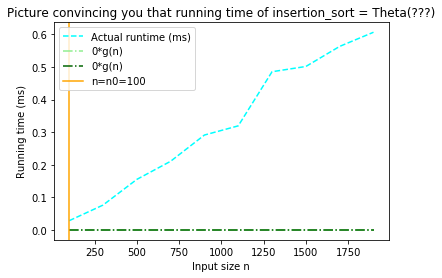

In [0]:
def g(n):
    return 0  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)

c_1 = 0  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)
c_2 = 0  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)
# NOTE: c_1 and c_2 may need to be pretty small; that's okay.
n0 = 100  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)

# Plots the three functions
plt.plot(ns,
         np.mean(insertion_sort_sorted_ts, axis=1),
         linestyle="--",
         color="cyan",
         label="Actual runtime (ms)")
plt.plot(ns,
         [c_1*g(n) for n in ns],
         linestyle="-.",
         color="lightgreen",
         label = str(c_1) + "*g(n)")
plt.plot(ns,
         [c_2*g(n) for n in ns],
         linestyle="-.",
         color="darkgreen",
         label = str(c_2) + "*g(n)")

# Plots the vertical line
plt.axvline(n0, color="orange", label="n=n0=" + str(n0))

# Adds some text
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Picture convincing you that running time of insertion_sort = Theta(???)")  # TODO: FILL IN YOUR ANSWER HERE
plt.legend()

## Exercise 2d

### Here, similar to Exercise 1 and 2c, you generate a plot that convinces you (and the grader) of the runtime of insertion_sort on a reverse-sorted list (tight-bound on the worst-case runtime).

By adjusting the values below, find such a $c_1$, $c_2$, and $n_0$, and create a picture that convinces you (and the grader) that $T(n) = \Theta(g(n))$.

### TURN IN: Your picture, your choices of c_1, c_2, and n0, along with why this plot should convince a viewer that the best-case runtime of insertion sort is what you claimed it was.

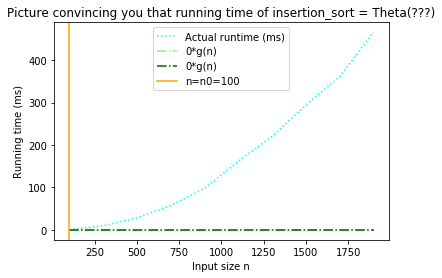

In [0]:
def g(n):
    return 0  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)

c_1 = 0  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)
c_2 = 0  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)
# NOTE: c_1 and c_2 may need to be pretty small; that's okay.
n0 = 100  # TODO: FILL IN YOUR ANSWER HERE (as in Exercise 1)

# Plot the three functions
plt.plot(ns,
         np.mean(insertion_sort_reverse_ts, axis=1),
         linestyle=":",
         color="cyan",
         label="Actual runtime (ms)")
plt.plot(ns,
         [c_1*g(n) for n in ns],
         linestyle="-.",
         color="lightgreen",
         label = str(c_1) + "*g(n)")
plt.plot(ns,
         [c_2*g(n) for n in ns],
         linestyle="-.",
         color="darkgreen",
         label = str(c_2) + "*g(n)")

# Plots the vertical line
plt.axvline(n0, color="orange", label="n=n0=" + str(n0))

# Adds some text
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Picture convincing you that running time of insertion_sort = Theta(???)")  # TODO: FILL IN YOUR ANSWER HERE
plt.legend()

# Exercise 2e

### How much time do you think it would take to sort a worst-case input of size $n = 10^{10}$ using insertion sort? Using mergesort?

### TURN IN: Your answer, in whichever of {ms, seconds, minutes, days, months, years, decades, centuries, ...} makes the most sense, and a brief justification for both insertion sort and mergesort. You can use either a picture like the one you generated in earlier parts, or any other method you like that uses the runtime data above.